# 1. Load the csv file using Pandas. Remap 'tested_positive' -> 1, 'tested_negative' -> 0. Print number of instances and attributes, and first 5 rows.



In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

# Creates list of attribute names
COLUMN_NAMES = [
    "preg",
    "plas",
    "pres",
    "skin",
    "insu",
    "mass",
    "pedi",
    "age",
    "class"
]

# Load the data
df = pd.read_csv("diabetes.csv", names=COLUMN_NAMES, header=0)

# Remap target class
print(df['class'].unique())
df['class'] = df['class'].map({'tested_positive': 1, 'tested_negative': 0})

print("Number of instances:", df.shape[0])
print("Number of attributes:", df.shape[1])
print("First 5 rows:")
print(df.head())

['tested_positive' 'tested_negative']
Number of instances: 768
Number of attributes: 9
First 5 rows:
   preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


# 2. Split the dataset into train and test sets

In [8]:
# Splits the dataset into train and test sets
X = df.drop('class', axis=1)
y = df['class']

# For reproducibility, set a random seed
RANDOM_SEED = 181
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify=y
)


# 3. Standardize data

In [9]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 4. Fits a Random Forest model on the train dataset. Predicts the class for the test set. Records confusion matrix and accuracy.

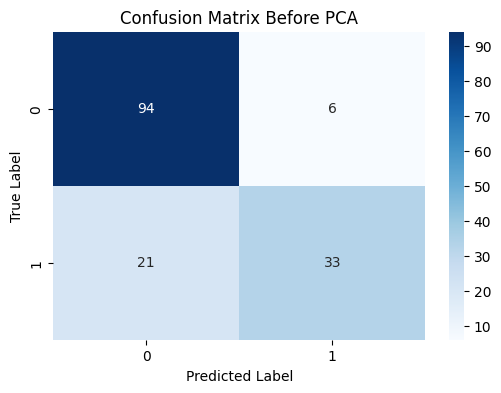

Accuracy (Before PCA): 82.46753246753246 %


In [30]:
# Random Forest parameters
n_estimators = 200             # number of trees
criterion = 'gini'             # criteria ('gini' or 'entropy' or 'log_loss')
max_depth = 10                 # maximum depth
min_samples_split = 4          # minimum # of objects for internal node to split
min_samples_leaf = 2           # minimum # of instances to be in a leaf node
max_features = 'sqrt'          # number of features to consider in a split
max_samples = None             # number (or fraction) of instances to be considered for each tree

rf = RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    max_samples=max_samples,
    random_state=RANDOM_SEED
)

# Fit the Random Forest on the training set
rf.fit(X_train_std, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_std)

# Evaluate
cm_before_pca = confusion_matrix(y_test, y_pred)
accuracy_before_pca = accuracy_score(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_before_pca, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix Before PCA")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Accuracy (Before PCA):", accuracy_before_pca * 100, "%")


# 5. Apply PCA (fit and transform on train set, transform on test set)

In [13]:
pca = PCA()  # Fits with all components, then decide how many to keep
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# 6. Generate Scree plot (explained variance vs cumulative)

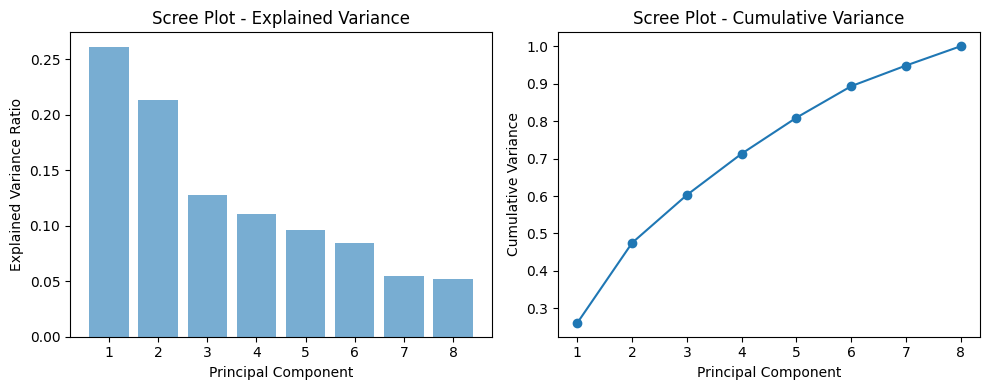

Cumulative Variance for d=3: 0.6027993094282371
Cumulative Variance for d=4: 0.7130146726124786
Cumulative Variance for d=5: 0.8091558065178873
Cumulative Variance for d=6: 0.8932670520961578
Cumulative Variance for d=7: 0.9483563227791026
Cumulative Variance for d=8: 0.9999999999999999


In [17]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree plot for explained variance
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Explained Variance')

# Cumulative variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Scree Plot - Cumulative Variance')
plt.tight_layout()
plt.show()

# To determine the best d - best balance between dimension reduction and cumulative variance retention
print(f"Cumulative Variance for d=3: {sum(pca.explained_variance_ratio_[:3])}")
print(f"Cumulative Variance for d=4: {sum(pca.explained_variance_ratio_[:4])}")
print(f"Cumulative Variance for d=5: {sum(pca.explained_variance_ratio_[:5])}")
print(f"Cumulative Variance for d=6: {sum(pca.explained_variance_ratio_[:6])}")
print(f"Cumulative Variance for d=7: {sum(pca.explained_variance_ratio_[:7])}")
print(f"Cumulative Variance for d=8: {sum(pca.explained_variance_ratio_[:8])}")



# 7. Re-run PCA with best number of d components


In [18]:
# Choosing d = 5 (best balance)
d = 5
pca_d = PCA(n_components=d)
X_train_pca_d = pca_d.fit_transform(X_train_std)
X_test_pca_d = pca_d.transform(X_test_std)

# 8. Print the explained_variance and its sum


In [19]:
explained_variance_d = pca_d.explained_variance_ratio_
print("\nExplained variance with d =", d, "components:")
print(explained_variance_d)
print("Sum of explained variance with d =", d, ":", explained_variance_d.sum())


Explained variance with d = 5 components:
[0.26127512 0.21361516 0.12790903 0.11021536 0.09614113]
Sum of explained variance with d = 5 : 0.8091558065178873


# 9. Apply Random Forest to the new d-dimensional dataset
#    and find confusion matrix and accuracy (same parameters as earlier)

In [23]:
rf_pca = RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    max_samples=max_samples,
    random_state=RANDOM_SEED
)

rf_pca.fit(X_train_pca_d, y_train)
y_pred_pca = rf_pca.predict(X_test_pca_d)

cm_after_pca = confusion_matrix(y_test, y_pred_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)

# 10. Plot of Confusion matrix before and after applying PCA

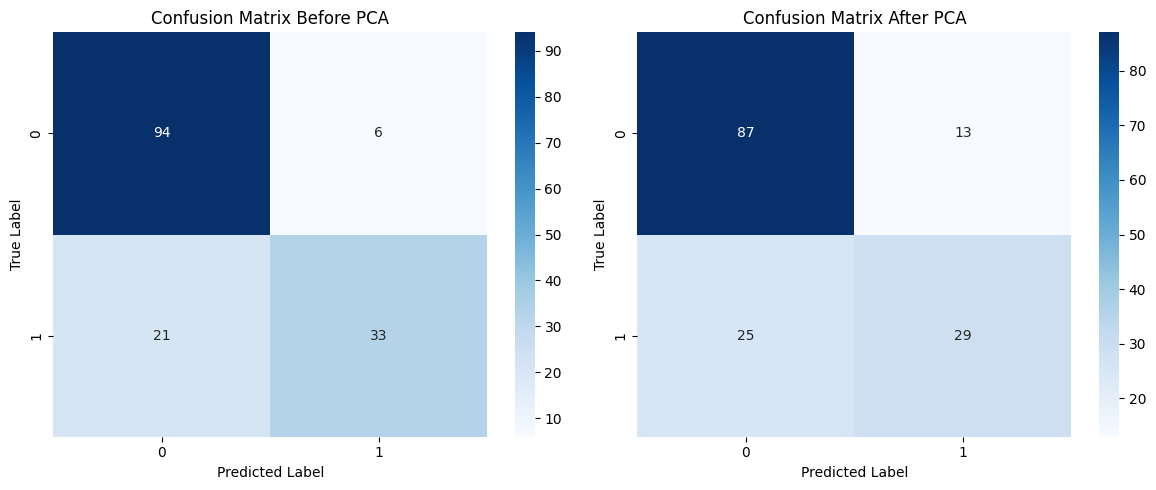

In [26]:
# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before PCA
sns.heatmap(cm_before_pca, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title("Confusion Matrix Before PCA")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion Matrix After PCA
sns.heatmap(cm_after_pca, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title("Confusion Matrix After PCA")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Adjust layout
plt.tight_layout()
plt.show()

# 11. Print accuracies before and after applying PCA

In [27]:
print("\nAccuracy (Before PCA):", accuracy_before_pca)
print("Accuracy (After PCA):", accuracy_after_pca)


Accuracy (Before PCA): 0.8246753246753247
Accuracy (After PCA): 0.7532467532467533


# 12. Plot the first 2 dimensions, color coded by the class


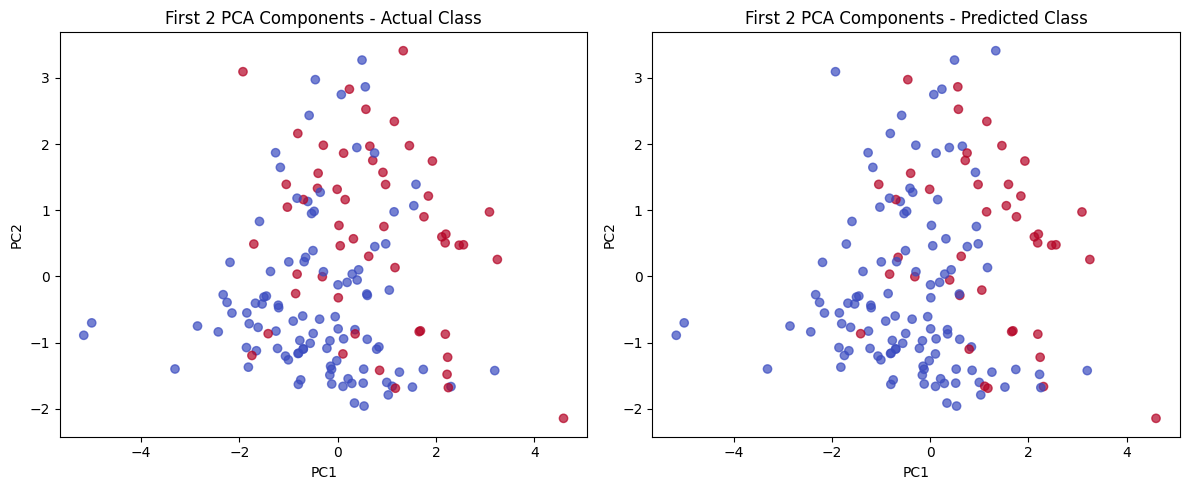

In [29]:
# Uses the d=5 PCA we already fit, but for the 2D plot, the first 2 PCs are used.
X_test_pca_2d = X_test_pca_d[:, :2]

# Plot side-by-side
plt.figure(figsize=(12, 5))

# Actual class
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
plt.title("First 2 PCA Components - Actual Class")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Predicted class
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c=y_pred_pca, cmap='coolwarm', alpha=0.7)
plt.title("First 2 PCA Components - Predicted Class")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

# 13. Plot the first 3 dimensions, color coded by the class

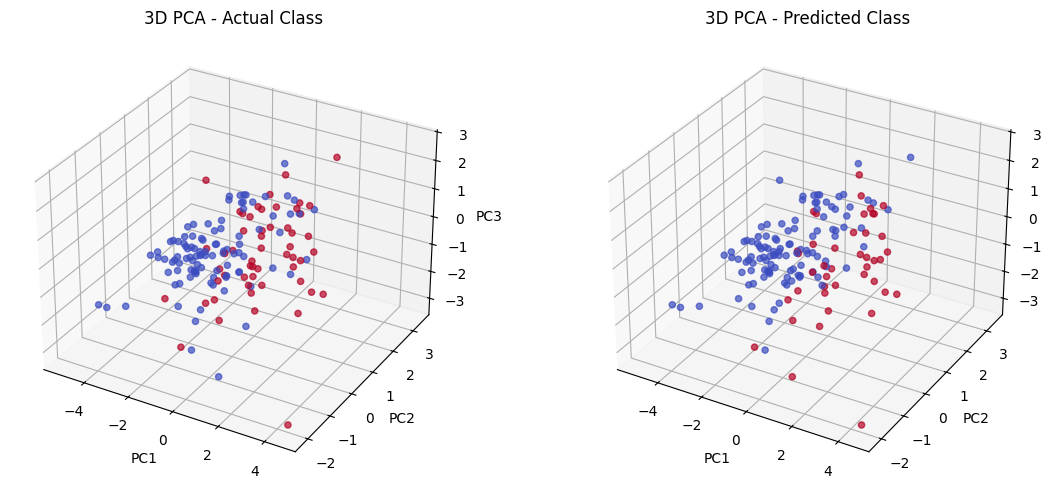

In [31]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# For 3D, we need the first 3 components from X_test_pca_d
X_test_pca_3d = X_test_pca_d[:, :3]

fig = plt.figure(figsize=(12, 5))

# Actual class in 3D
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
scatter1 = ax1.scatter(
    X_test_pca_3d[:, 0],
    X_test_pca_3d[:, 1],
    X_test_pca_3d[:, 2],
    c=y_test,
    cmap='coolwarm',
    alpha=0.7
)
ax1.set_title("3D PCA - Actual Class")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")

# Predicted class in 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter2 = ax2.scatter(
    X_test_pca_3d[:, 0],
    X_test_pca_3d[:, 1],
    X_test_pca_3d[:, 2],
    c=y_pred_pca,
    cmap='coolwarm',
    alpha=0.7
)
ax2.set_title("3D PCA - Predicted Class")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")

plt.tight_layout()
plt.show()